In [1]:
import time
import networkx as nx 

from map_processing import (
    load_and_initialize_map,
    find_shortest_path,
    find_nearest_node,
    find_nearest_edge,
    perform_bfs
)

OSMnx version used in map_processing: 2.0.2
NetworkX version used in map_processing: 3.4.2


In [2]:
G_proj, gdf_edges, initial_node_phase= load_and_initialize_map()

print(G_proj)


Starting map loading for 'San Francisco, California, USA'...
Requesting graph for 'San Francisco, California, USA'. Will use cache if available.
OSMnx cache folder: ./cache


/opt/anaconda3/envs/cerebralVal/lib/python3.13/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/cerebralVal/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/cerebralVal/lib/python3.13/site-packages/shapely/set_operations.py:334: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/cerebralVal/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/cerebralVal/lib/python3.13/site-packages/shapely/set_operations.py:334: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


Graph contains 13643 unique roads.
Graph retrieved (CRS: epsg:4326). Contains 27580 raw edges.
Converting graph to undirected...
Graph type: <class 'networkx.classes.multigraph.MultiGraph'>
Adding edge bearings...
Bearings added.
Projecting graph...
Graph projected (CRS: EPSG:32610).
Processed graph has 10006 nodes and 16533 edges.
Graph type: <class 'networkx.classes.multigraph.MultiGraph'>
Assigning initial random traffic light phases...
Assigned initial NS/EW phases to 10006 nodes.
Calculating initial edge signal groups, light/color states, and traffic levels...
Finished calculating initial states for 16533 edges.
Converting edge data to GeoDataFrame...
Converting GeoDataFrame CRS from EPSG:32610 back to EPSG:4326...
GeoDataFrame CRS is now: EPSG:4326
GeoDataFrame created.
Map loading and initialization complete. Time taken: 6.25 seconds.
MultiGraph with 10006 nodes and 16533 edges


/opt/anaconda3/envs/cerebralVal/lib/python3.13/site-packages/osmnx/convert.py:542: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])


In [3]:
vehicles = [
    {"id": 1, "type": "fire", "name": "firefighter_1", "station_address": "2241 Jerrold Ave, San Francisco, CA 94124, USA", "station_latitude": 37.755836, "station_longitude": -122.428429, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 2, "type": "fire", "name": "firefighter_2", "station_address": "2150 California St, San Francisco, CA 94115", "station_latitude": 37.784279, "station_longitude": -122.407234, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 3, "type": "fire", "name": "firefighter_3", "station_address": "441 12th Ave, San Francisco, CA 94118", "station_latitude": 37.779847, "station_longitude": -122.471177, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 4, "type": "police", "name": "police_1", "station_address": "766 Vallejo St, San Francisco, CA 94133", "station_latitude": 37.798729, "station_longitude": -122.409912, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 5, "type": "police", "name": "police_2", "station_address": "630 Valencia St, San Francisco, CA 94110", "station_latitude": 37.762852, "station_longitude": -122.421944, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 6, "type": "police", "name": "police_3", "station_address": "2345 24th Ave, San Francisco, CA 94116", "station_latitude": 37.743732, "station_longitude": -122.481461, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 7, "type": "med", "name": "medical_1", "station_address": "698 Second St, San Francisco, CA 94107", "station_latitude": 37.780682, "station_longitude": -122.390854, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 8, "type": "med", "name": "medical_2", "station_address": "1300 Illinois St, San Francisco, CA 94107", "station_latitude": 37.754686, "station_longitude": -122.387411, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 9, "type": "med", "name": "medical_3", "station_address": "2570 Bush St, San Francisco, CA 94115", "station_latitude": 37.786523, "station_longitude": -122.439595, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 10, "type": "fire", "name": "firefighter_12", "station_address": "2241 Jerrold Ave, San Francisco, CA 94124, USA", "station_latitude": 37.755836, "station_longitude": -122.428429, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 11, "type": "fire", "name": "firefighter_13", "station_address": "2241 Jerrold Ave, San Francisco, CA 94124, USA", "station_latitude": 37.755836, "station_longitude": -122.428429, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 12, "type": "fire", "name": "firefighter_22", "station_address": "2150 California St, San Francisco, CA 94115", "station_latitude": 37.784279, "station_longitude": -122.407234, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 15, "type": "police", "name": "police_12", "station_address": "766 Vallejo St, San Francisco, CA 94133", "station_latitude": 37.798729, "station_longitude": -122.409912, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 18, "type": "police", "name": "police_32", "station_address": "2345 24th Ave, San Francisco, CA 94116", "station_latitude": 37.743732, "station_longitude": -122.481461, "status": "ready", "target_lat": None, "target_lng": None},
    {"id": 21, "type": "med", "name": "medical_22", "station_address": "1300 Illinois St, San Francisco, CA 94107", "station_latitude": 37.754686, "station_longitude": -122.387411, "status": "ready", "target_lat": None, "target_lng": None}
]


In [ ]:
station_locations = {
    "Fire_Station_1": (37.74525, -122.40122),
}
station_locations

{'Fire_Station_1': (37.74525, -122.40122)}

In [5]:
user_loc = {
    "hotel" : (37.7821, -122.4047)
}
user_loc


{'hotel': (37.7821, -122.4047)}

In [ ]:
fire_station = [37.74525, -122.40122]
hotel = [37.7821, -122.4047]

station_node = find_nearest_node(G_proj, fire_station[0], fire_station[1])
print("Station node:", station_node)

user_node = find_nearest_node(G_proj, hotel[0], hotel[1])
print("User node:", user_node)

shortest = find_shortest_path(G_proj, user_node, station_node)
print("Shortest path:", shortest)


Station node: 65291486
User node: 6873099368
Finding shortest path from 6873099368 to 65291486 using Dijkstra...
Shortest path found with 23 nodes.
Shortest path: [6873099368, 65306804, 65351774, 65317542, 12479146933, 65351775, 65351780, 65282779, 1260360822, 65285808, 65285848, 65371530, 314139502, 65283717, 295222216, 65286435, 65322266, 65283914, 5108177063, 65291494, 65291491, 65291490, 65291486]


In [ ]:
result_list = []  # Initialize an empty list to store result

all_station_coords = [
    [v['station_latitude'], v['station_longitude']] for v in vehicles
]

for all_station_coords in all_station_coords:
    for first_vehicle in vehicles:
        # Create the dispatch_station list [latitude, longitude]
        dispatch_station = [first_vehicle['station_latitude'], first_vehicle['station_longitude']]
        print(f"Using station for {first_vehicle['name']} ({first_vehicle['type']}) as destination: {dispatch_station}")

        station_node = find_nearest_node(G_proj, dispatch_station[0], dispatch_station[1])
        print("Station node:", station_node)

        user_node = find_nearest_node(G_proj, hotel[0], hotel[1])
        print("User node:", user_node)

        shortest = find_shortest_path(G_proj, user_node, station_node)
        print("Shortest path:", shortest)

        # Append the result to result_list
        result_list.append({
            "vehicle_id": first_vehicle['id'],
            "vehicle_name": first_vehicle['name'],
            "vehicle_type": first_vehicle['type'],
            "station_coords": dispatch_station,
            "user_coords": hotel,
            "path_nodes": shortest
        })

# Display the result_list
print("\nResult List:")
for result in result_list:
    print(result)

Using station for firefighter_1 (fire) as destination: [37.755836, -122.428429]
Station node: 65318058
User node: 6873099368
Finding shortest path from 6873099368 to 65318058 using Dijkstra...
Shortest path found with 36 nodes.
Shortest path: [6873099368, 65306804, 65351774, 65317542, 12479146933, 65351775, 65351780, 65282779, 1260360822, 65285808, 65285848, 65371530, 314139502, 65284015, 65281218, 1723738842, 65319667, 65314348, 65292028, 65307645, 65309828, 174643927, 65319662, 11037771516, 65317391, 10946845802, 10946845804, 10920760923, 258968246, 65318628, 300752968, 258967884, 65294265, 65318056, 65302214, 65318058]
Using station for firefighter_2 (fire) as destination: [37.784279, -122.407234]
Station node: 7293111110
User node: 6873099368
Finding shortest path from 6873099368 to 7293111110 using Dijkstra...
Shortest path found with 7 nodes.
Shortest path: [6873099368, 65306804, 65319526, 65351772, 65371286, 65332806, 7293111110]
Using station for firefighter_3 (fire) as destina


Preparing plot...
Filtering valid paths for plotting...
  Added path for Vehicle ID 1 to plot.
  Added path for Vehicle ID 2 to plot.
  Added path for Vehicle ID 3 to plot.
  Added path for Vehicle ID 4 to plot.
  Added path for Vehicle ID 5 to plot.
  Added path for Vehicle ID 6 to plot.
  Added path for Vehicle ID 7 to plot.
  Added path for Vehicle ID 8 to plot.
  Added path for Vehicle ID 9 to plot.
  Added path for Vehicle ID 10 to plot.
  Added path for Vehicle ID 11 to plot.
  Added path for Vehicle ID 12 to plot.
  Added path for Vehicle ID 15 to plot.
  Added path for Vehicle ID 18 to plot.
  Added path for Vehicle ID 21 to plot.
  Added path for Vehicle ID 1 to plot.
  Added path for Vehicle ID 2 to plot.
  Added path for Vehicle ID 3 to plot.
  Added path for Vehicle ID 4 to plot.
  Added path for Vehicle ID 5 to plot.
  Added path for Vehicle ID 6 to plot.
  Added path for Vehicle ID 7 to plot.
  Added path for Vehicle ID 8 to plot.
  Added path for Vehicle ID 9 to plot.
 

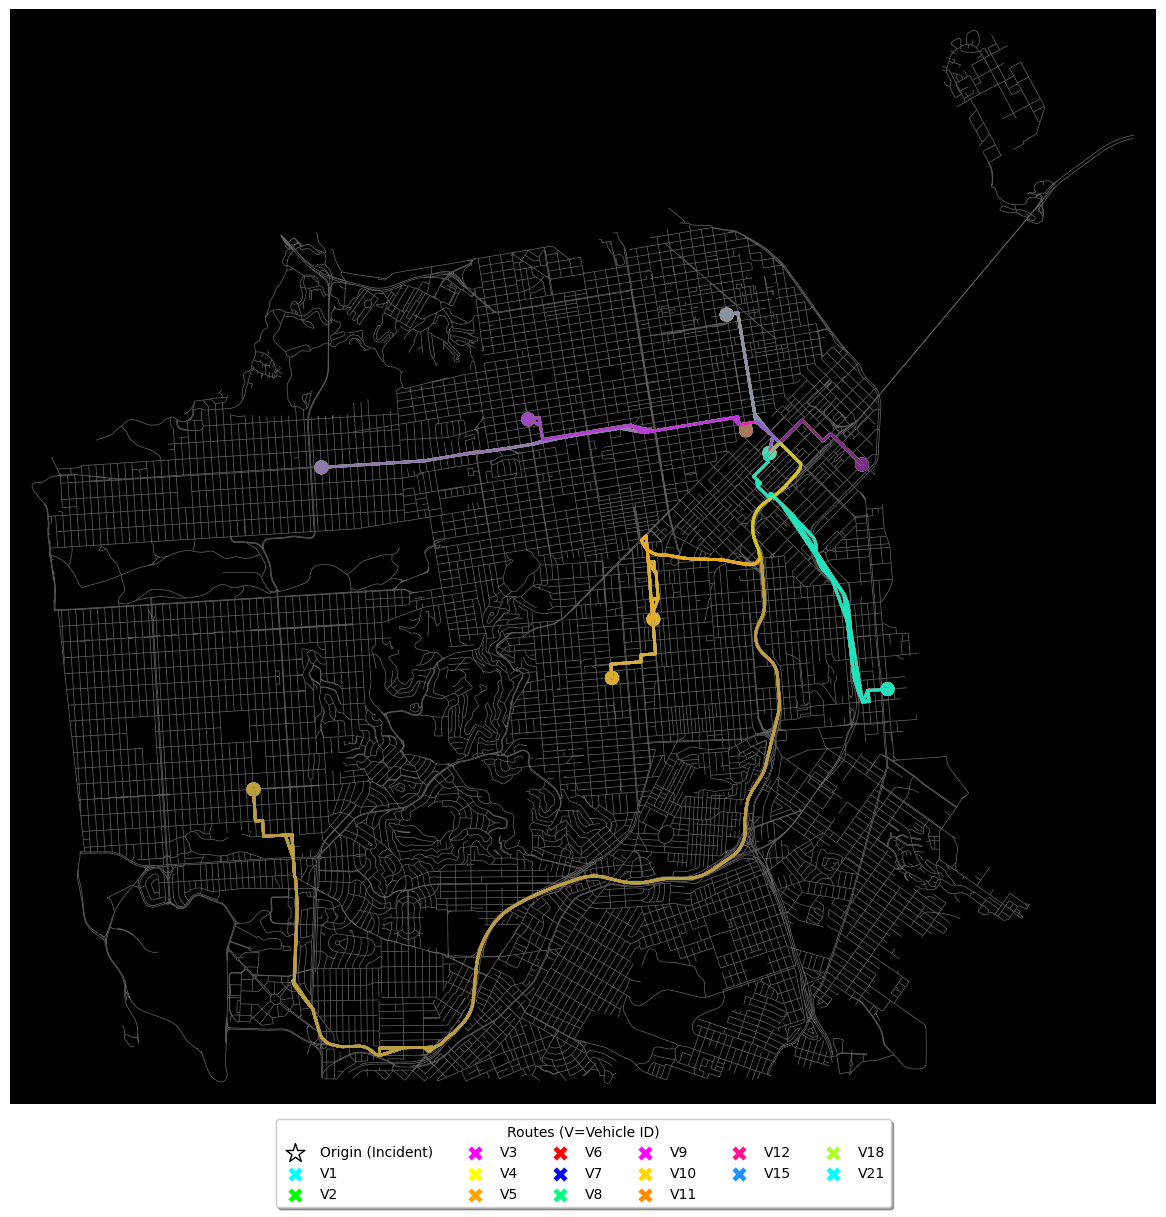

Plot displayed.


In [32]:
print("\nPreparing plot...")

# Check if result exist and are not empty
# Use 'result_list' which should be defined from cell 4
if 'result_list' not in locals() or not result_list:
    print("Cannot plot: 'result_list' is not defined or empty.")
elif 'G_undirected' not in locals():
    print("Cannot plot: 'G_undirected' graph is not defined.")
else:
    # Define a list of colors for the paths
    color_list = ['cyan', 'lime', 'magenta', 'yellow', 'orange', 'red', 'blue',
                  'springgreen', 'fuchsia', 'gold', 'darkorange', 'deeppink', 'dodgerblue', 'greenyellow']
    # Use itertools.cycle to reuse colors if there are more paths than colors
    color_cycle = itertools.cycle(color_list)

    routes_to_plot = []
    route_colors = []
    station_markers = [] # To store coords, colors, and labels for station markers

    # Filter result to get only valid paths (list of nodes with length > 1)
    print("Filtering valid paths for plotting...")
    for result in result_list: # Use result_list here
        path = result.get('path_nodes')
        vehicle_id = result.get('vehicle_id', 'N/A')
        # Check if path exists, is a list/tuple, and has more than one node
        if path and isinstance(path, (list, tuple)) and len(path) > 1:
            routes_to_plot.append(path)
            color = next(color_cycle) # Get the next color
            route_colors.append(color)
            # Store station info for markers
            station_markers.append({
                "coords": result.get("station_coords"),
                "color": color,
                "label": f"V{vehicle_id}" # Short label for marker
            })
            print(f"  Added path for Vehicle ID {vehicle_id} to plot.")
        elif path and isinstance(path, (list, tuple)) and len(path) == 1:
             print(f"  Skipping plot for Vehicle ID {vehicle_id}: Origin and destination node are the same ({path[0]}).")
        else:
             # Check if error was 'No path found' or other
             error = result.get('error')
             reason = f": {error}" if error else ": No valid path data."
             print(f"  Skipping plot for Vehicle ID {vehicle_id}{reason}")


    if not routes_to_plot:
        print("\nNo valid paths found to plot.")
    else:
        print(f"\nPlotting {len(routes_to_plot)} paths...")
        try:
            # Use G_undirected (with lat/lon) for plotting routes
            fig, ax = ox.plot_graph_routes(
                G_undirected,           # Use the graph with lat/lon coordinates
                routes_to_plot,         # List of paths (node lists)
                route_colors=route_colors, # List of colors for each path
                route_linewidths=2,     # Make routes visible
                node_size=0,            # Hide nodes on the base map
                bgcolor='black',
                edge_color='dimgray',   # Color for base map edges
                edge_linewidth=0.5,
                # orig_dest_nodes=None, # REMOVED this argument to fix TypeError
                figsize=(15, 15),       # Make plot larger
                show=False,             # Don't show yet
                close=False             # Keep open to add markers
            )

            # Add marker for the fixed origin (hotel)
            # Use longitude (x), latitude (y) for scatter plot
            # Ensure hotel variable is accessible
            if 'hotel' in locals():
                 ax.scatter(hotel[1], hotel[0], c='white', s=200, label='Origin (Incident)', zorder=6, marker='*', edgecolor='black')
            else:
                 print("Warning: 'hotel' variable not found for plotting origin marker.")


            # Add markers for each station (destination) corresponding to a plotted route
            plotted_station_labels = set() # To avoid duplicate labels if stations overlap
            for marker_info in station_markers:
                coords = marker_info["coords"]
                color = marker_info["color"]
                label = marker_info["label"]
                if coords and len(coords) == 2: # Check if coords are valid
                    # Add label only once per unique vehicle ID (in case of duplicate stations/routes)
                    display_label = label if label not in plotted_station_labels else None
                    ax.scatter(coords[1], coords[0], c=color, s=120, label=display_label, zorder=5, marker='X', edgecolor='white', linewidth=0.5)
                    plotted_station_labels.add(label)
                else:
                    print(f"Warning: Invalid coordinates for marker {label}: {coords}")


            # Add a legend
            handles, labels = ax.get_legend_handles_labels()
            if handles: # Only show legend if there are items to label
                 # Adjust layout to prevent legend overlapping plot
                 fig.subplots_adjust(bottom=0.15) # Add more space at the bottom
                 ax.legend(
                     handles=handles, # Pass handles explicitly
                     labels=labels,   # Pass labels explicitly
                     loc='lower center', # Place below the plot
                     bbox_to_anchor=(0.5, -0.1), # Position relative to axis
                     fancybox=True, shadow=True, ncol=min(len(handles), 6), # Adjust columns dynamically
                     title="Routes (V=Vehicle ID)"
                 )
            else:
                 print("No labels generated for legend.")


            print("Displaying plot...")
            plt.show()
            print("Plot displayed.")

        except Exception as plot_error:
             print(f"\nAn error occurred during plotting: {plot_error}")
             print("Ensure 'G_undirected' has 'x' and 'y' node attributes and necessary libraries are installed.")
